In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 產生 2D 分類資料
X, y = make_classification(
    n_samples=200,         # 總共生成 200 筆樣本
    n_features=2,          # 每筆樣本有 2 個特徵（2D）
    n_informative=2,       # 2 個有用的資訊特徵（實際參與分類）
    n_redundant=0,         # 0 個冗餘特徵（由其他特徵線性組合而成）
    n_clusters_per_class=1,# 每個類別只有一個群集（不分散）
    flip_y=0.05,           # 5% 樣本標籤會被隨機翻轉（製造噪聲）
    random_state=42        # 固定隨機種子，結果可重現
)

# 切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立 AdaBoost 模型，使用決策樹樁作為基礎分類器
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=7,
    random_state=42
)
model.fit(X_train, y_train)

# 預測與評估
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"模型測試準確率: {acc:.2f}")

模型測試準確率: 0.80


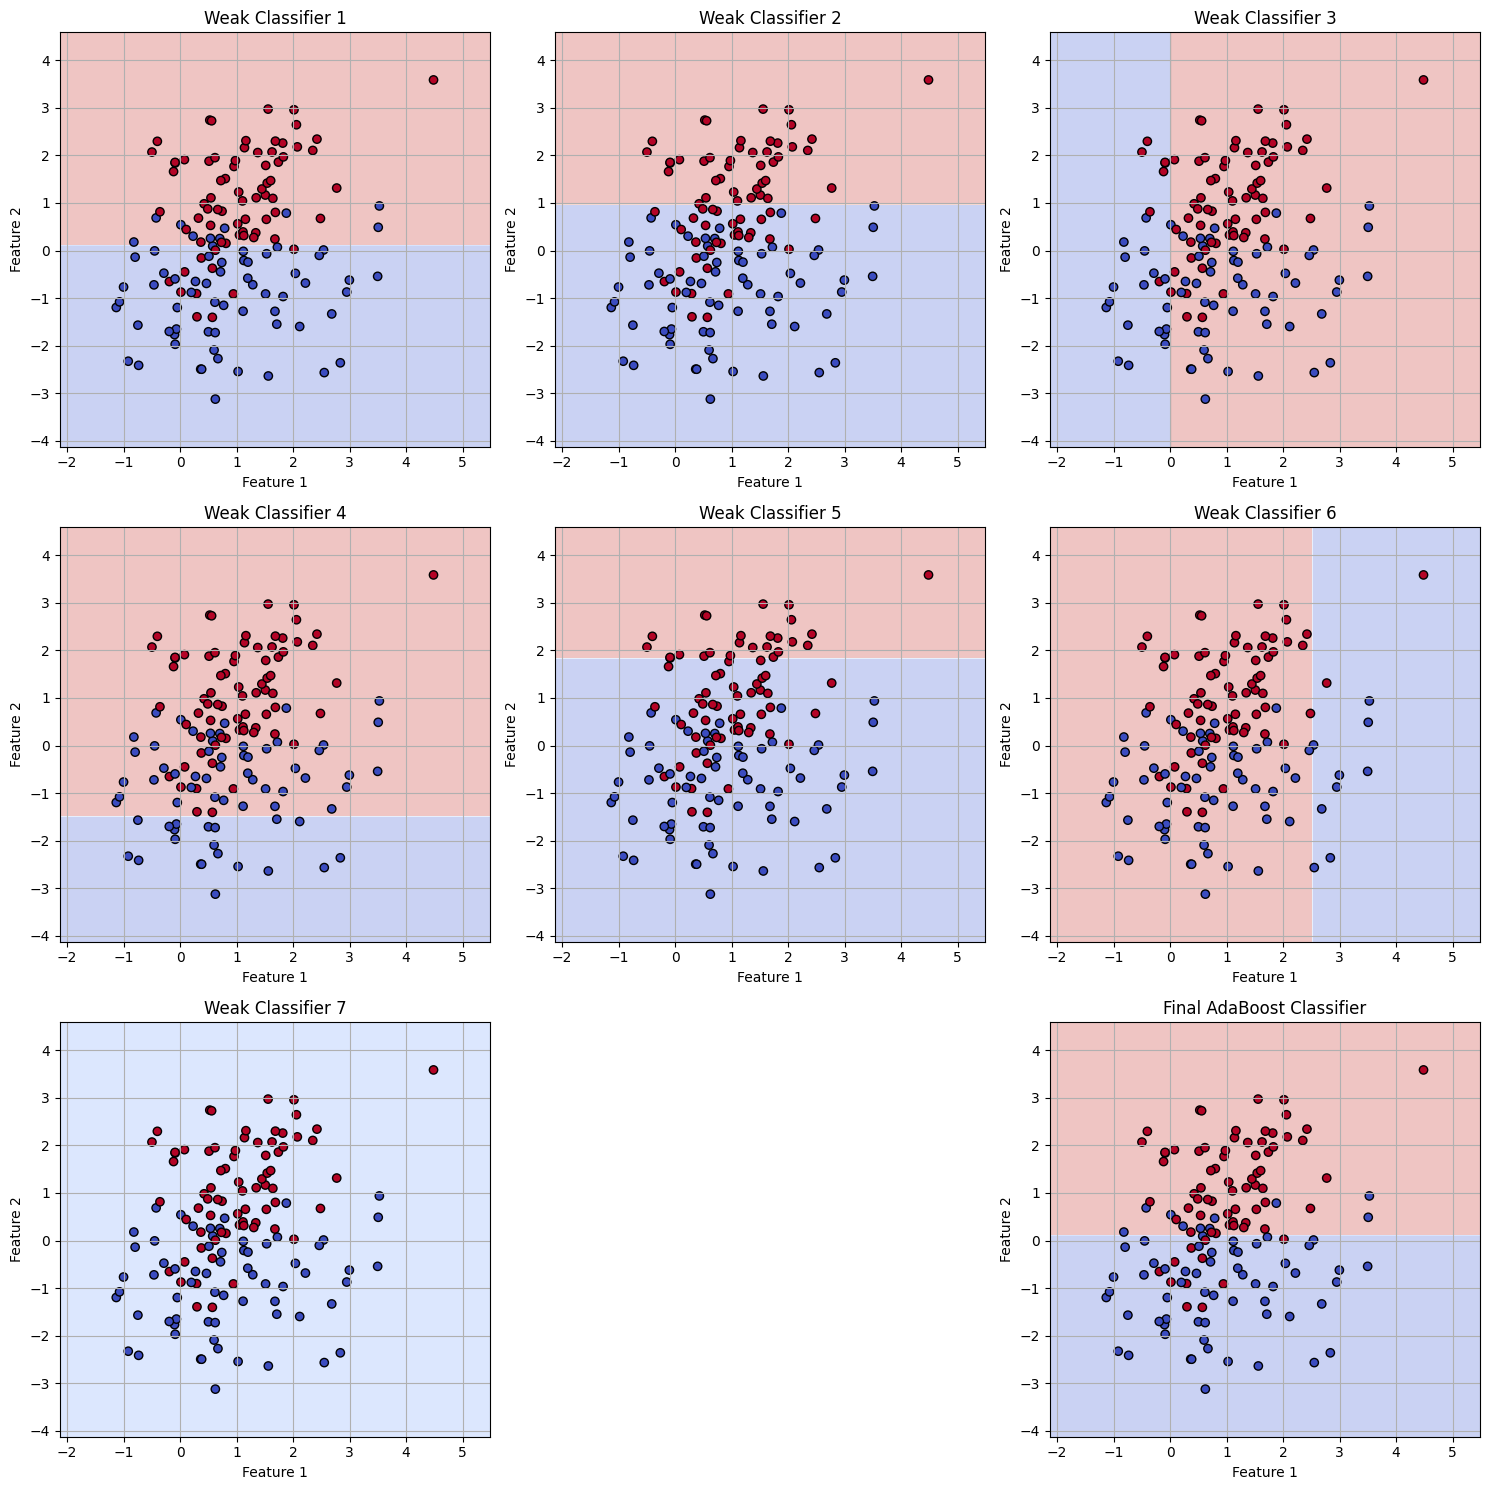

In [12]:
# 繪製分類邊界
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

# 顯示每一個弱分類器的邊界
plt.figure(figsize=(15, 15))  # 調整整體畫布大小

for i, stump in enumerate(model.estimators_):
    plt.subplot(3, 3, i + 1)
    plot_decision_boundary(stump, X_train, y_train, f"Weak Classifier {i+1}")

plt.subplot(3, 3, 9)
plot_decision_boundary(model, X_train, y_train, "Final AdaBoost Classifier")

plt.tight_layout()
plt.show()